# Loading required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score




# Import dataset

In [2]:
df = pd.read_csv("data.csv")
df2 = pd.read_csv("data.csv")                 

In [3]:
df.columns

Index(['car_company', 'model_ID', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'car_paint_color', 'car_type', 'feature1',
       'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7',
       'feature8', 'sold_date', 'car_price'],
      dtype='object')

In [4]:
df

,car_company,model_ID,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price
0,Edureka_motors,318 Gran Turismo,140245,105,01-10-2014,diesel,white,hatchback,False,True,False,False,True,True,True,True,01-03-2018,19200
1,Edureka_motors,218 Active Tourer,91512,100,01-06-2015,petrol,white,van,False,True,True,False,False,False,True,False,01-05-2018,14300
2,Edureka_motors,318,113744,100,01-06-2012,diesel,grey,sedan,True,True,False,False,False,False,True,False,01-06-2018,14300
3,Edureka_motors,320 Gran Turismo,195063,135,01-05-2014,diesel,black,hatchback,False,True,True,False,True,False,True,True,01-03-2018,16200
4,Edureka_motors,518,148943,100,01-11-2013,diesel,brown,estate,True,True,True,False,True,False,True,True,01-05-2018,17300
5,Edureka_motors,520,150439,120,01-10-2012,diesel,grey,sedan,False,True,False,False,False,False,True,False,01-03-2018,13700
6,Edureka_motors,X5,96715,160,01-06-2014,diesel,brown,suv,True,True,False,True,True,False,True,True,01-08-2018,35400
7,Edureka_motors,116,137660,85,01-10-2012,diesel,blue,hatchback,True,True,False,False,False,True,True,False,01-06-2018,9000
8,Edureka_motors,530,160072,190,01-03-2014,diesel,black,sedan,False,True,True,False,True,True,True,True,01-04-2018,27300
9,Edureka_motors,318 Gran Turismo,43032,100,01-01-2016,diesel,white,hatchback,True,True,False,False,True,False,True,True,01-03-2018,23800



# Data preprocessing

In [5]:
df.isnull().sum()   #checking any null values in the dataset

car_company          0
model_ID             0
mileage              0
engine_power         0
registration_date    0
fuel                 0
car_paint_color      0
car_type             0
feature1             0
feature2             0
feature3             0
feature4             0
feature5             0
feature6             0
feature7             0
feature8             0
sold_date            0
car_price            0
dtype: int64

In [6]:
df.dtypes #checking the datatype of the columns

car_company          object
model_ID             object
mileage               int64
engine_power          int64
registration_date    object
fuel                 object
car_paint_color      object
car_type             object
feature1               bool
feature2               bool
feature3               bool
feature4               bool
feature5               bool
feature6               bool
feature7               bool
feature8               bool
sold_date            object
car_price             int64
dtype: object

# Handling object type columns

In [7]:
df.car_company.value_counts()   #counting the different kinds of values present in the particular columns

Edureka_motors    3390
Name: car_company, dtype: int64

In [8]:
del df['car_company']           #there is only one type of car_company available in the columns and it doesn't affect the car price

In [9]:
df.model_ID.value_counts()      #checking the numbers of unique values in model id 

320                  530
520                  449
318                  397
X3                   307
116                  254
X1                   188
316                  166
X5                   165
525                  123
118                   99
530                   99
318 Gran Turismo      74
320 Gran Turismo      55
518                   42
X6                    35
X4                    34
535                   33
420                   33
420 Gran Coupé        24
120                   21
330                   20
730                   20
640 Gran Coupé        15
520 Gran Turismo      14
325                   13
530 Gran Turismo      13
X5 M                  13
218 Active Tourer     12
740                   12
114                   11
                    ... 
135                    4
328                    4
435                    3
216 Active Tourer      3
435 Gran Coupé         3
Z4                     3
535 Gran Turismo       2
123                    2
M235                   2


In [10]:
df = pd.concat([df, pd.get_dummies(df['model_ID'])], axis =1)    #encoding model_id 

In [11]:
del df['model_ID']     #dropping the old categorical model id 

In [12]:
df.registration_date.value_counts()       #counting the different types of registration dates in the datasets

01-07-2013    120
01-09-2013    114
01-01-2013    110
01-10-2013    100
01-03-2014     98
01-05-2014     97
01-06-2013     97
01-04-2014     97
01-01-2014     94
01-02-2013     91
01-02-2014     91
01-04-2013     85
01-05-2013     83
01-08-2013     83
01-03-2013     81
01-07-2014     80
01-09-2014     78
01-11-2013     75
01-06-2012     68
01-10-2012     68
01-08-2014     65
01-11-2012     63
01-06-2014     61
01-10-2014     59
01-03-2012     58
01-07-2012     56
01-01-2012     48
01-12-2013     47
01-11-2014     47
01-08-2012     47
             ... 
01-06-1999      1
01-03-1999      1
01-09-2003      1
01-04-2017      1
01-12-2016      1
01-03-1990      1
01-02-1998      1
01-04-2006      1
01-09-1998      1
01-11-2017      1
01-01-2002      1
01-04-2005      1
01-05-2000      1
01-09-2007      1
01-07-2000      1
01-04-2004      1
01-10-1995      1
01-06-2000      1
01-10-1996      1
01-03-2017      1
01-06-2010      1
01-07-2003      1
01-01-2004      1
01-12-2007      1
01-07-1997

In [13]:
df['registration_date'] = pd.to_datetime(df['registration_date'])
df['year']= df['registration_date'].dt.year               
#since the change is seen in days and months format so we make new columns for day and month of registration


In [14]:
df['day']= df['registration_date'].dt.day                


In [15]:
df['day'].value_counts()

1     344
3     322
7     321
10    321
6     302
9     299
4     293
5     286
2     268
11    248
8     247
12    139
Name: day, dtype: int64

In [16]:
df['year'].value_counts()

2013    1086
2014     888
2012     594
2015     221
2011     143
2010      72
2008      71
2009      66
2016      55
2006      46
2007      42
2005      31
2004      18
2003      13
2001      12
2000       7
2002       7
2017       7
1997       2
1999       2
1998       2
1996       2
1995       1
1994       1
1990       1
Name: year, dtype: int64

In [17]:
df['year']= df.year[:]-1990             #oldest registration date is 1990 so we substract every registration date with 1990 

In [18]:
del df['registration_date']


In [19]:
df['fuel'].value_counts()

diesel           3239
petrol            142
hybrid_petrol       6
electro             3
Name: fuel, dtype: int64

In [20]:
df = pd.concat([df, pd.get_dummies(df['fuel'])], axis = 1)    #encoding fuel values

In [21]:
del df['fuel']

In [22]:
df = pd.concat([df, pd.get_dummies(df['car_paint_color'])], axis =1)   #encoding car paint color values

In [23]:
del df['car_paint_color']

In [24]:
df.car_type.value_counts()

estate         1095
sedan           826
suv             746
hatchback       506
subcompact       79
coupe            71
van              35
convertible      32
Name: car_type, dtype: int64

In [25]:
df = pd.concat([df, pd.get_dummies(df['car_type'])], axis =1)   #encoding the car type

In [26]:
del df['car_type']

In [27]:
df['feature1'] = (df['feature1'] == True).astype(int)
df['feature2'] = (df['feature2'] == True).astype(int)
df['feature3'] = (df['feature3'] == True).astype(int)
df['feature4'] = (df['feature4'] == True).astype(int)    #encoding the feature values 
df['feature5'] = (df['feature5'] == True).astype(int)
df['feature6'] = (df['feature6'] == True).astype(int)
df['feature7'] = (df['feature7'] == True).astype(int)
df['feature8'] = (df['feature8'] == True).astype(int)

In [28]:
df.sold_date.value_counts()                    

01-05-2018    553
01-03-2018    521
01-04-2018    513
01-06-2018    441
01-07-2018    362
01-08-2018    359
01-02-2018    341
01-09-2018    158
01-01-2018    142
Name: sold_date, dtype: int64

In [29]:
df['sold_date'] = pd.to_datetime(df['sold_date'])             #in sold date change is seen only in days we extract sold day
df['sold_day']= df['sold_date'].dt.day

In [30]:
df.sold_day.value_counts()

5    553
3    521
4    513
6    441
7    362
8    359
2    341
9    158
1    142
Name: sold_day, dtype: int64

In [31]:
del df['sold_date']

In [32]:
df.dtypes

mileage              int64
engine_power         int64
feature1             int32
feature2             int32
feature3             int32
feature4             int32
feature5             int32
feature6             int32
feature7             int32
feature8             int32
car_price            int64
114                  uint8
116                  uint8
118                  uint8
120                  uint8
123                  uint8
125                  uint8
135                  uint8
214 Gran Tourer      uint8
216                  uint8
216 Active Tourer    uint8
216 Gran Tourer      uint8
218                  uint8
218 Active Tourer    uint8
218 Gran Tourer      uint8
220                  uint8
220 Active Tourer    uint8
225                  uint8
225 Active Tourer    uint8
316                  uint8
                     ...  
X5 M50               uint8
X6                   uint8
X6 M                 uint8
Z4                   uint8
i3                   uint8
year                 int64
d

# normallization of the data


In [33]:
df.var()                        #checking the variation of every feature

mileage              3.772922e+09
engine_power         1.551115e+03
feature1             2.474081e-01
feature2             1.626833e-01
feature3             1.586253e-01
feature4             1.577309e-01
feature5             2.482689e-01
feature6             1.834323e-01
feature7             6.351705e-02
feature8             2.490206e-01
car_price            8.919231e+07
114                  3.235263e-03
116                  6.933276e-02
118                  2.835906e-02
120                  6.158133e-03
123                  5.897964e-04
125                  1.178896e-03
135                  1.178896e-03
214 Gran Tourer      2.949853e-04
216                  2.949853e-04
216 Active Tourer    8.844335e-04
216 Gran Tourer      1.178896e-03
218                  2.061241e-03
218 Active Tourer    3.528333e-03
218 Gran Tourer      1.767300e-03
220                  2.949853e-04
220 Active Tourer    2.949853e-04
225                  2.949853e-04
225 Active Tourer    2.949853e-04
316           

In [34]:
#standardizing the milieage 
df.mileage = (df.mileage - df.mileage.min())/(df.mileage.max()-df.mileage.min())      

In [35]:
#standardizing engine power to reduce the variance
df.engine_power = (df.engine_power - df.engine_power.mean())/(df.engine_power.std())  

In [36]:
df.var()

mileage              3.769604e-03
engine_power         1.000000e+00
feature1             2.474081e-01
feature2             1.626833e-01
feature3             1.586253e-01
feature4             1.577309e-01
feature5             2.482689e-01
feature6             1.834323e-01
feature7             6.351705e-02
feature8             2.490206e-01
car_price            8.919231e+07
114                  3.235263e-03
116                  6.933276e-02
118                  2.835906e-02
120                  6.158133e-03
123                  5.897964e-04
125                  1.178896e-03
135                  1.178896e-03
214 Gran Tourer      2.949853e-04
216                  2.949853e-04
216 Active Tourer    8.844335e-04
216 Gran Tourer      1.178896e-03
218                  2.061241e-03
218 Active Tourer    3.528333e-03
218 Gran Tourer      1.767300e-03
220                  2.949853e-04
220 Active Tourer    2.949853e-04
225                  2.949853e-04
225 Active Tourer    2.949853e-04
316           

# Data exploration and Data modeling

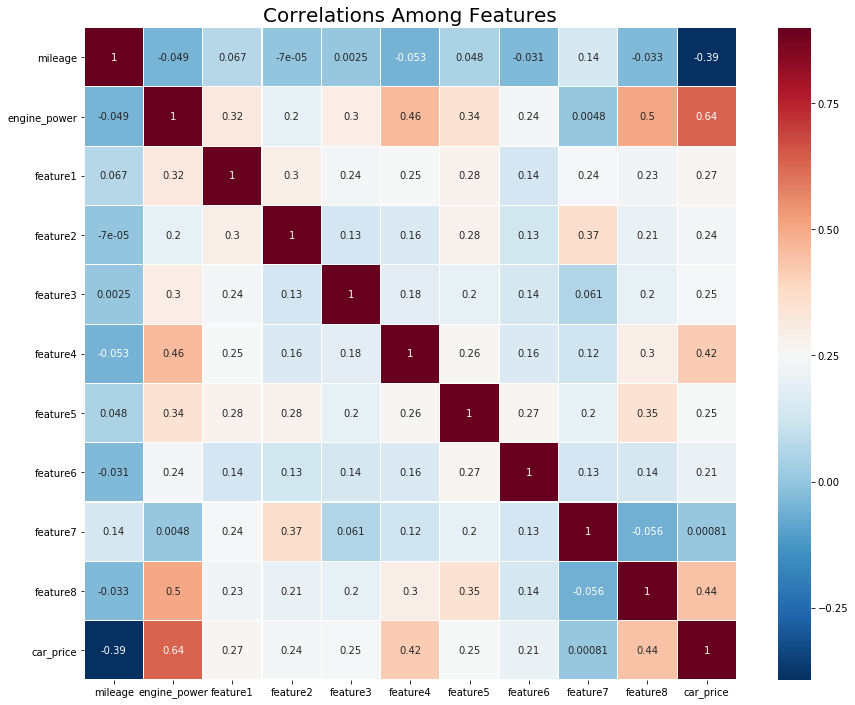

In [37]:

 #checking the correlation intially among features
mask = np.zeros_like(df2.corr(), dtype=np.bool)


plt.subplots(figsize = (15,12))
sns.heatmap(df2.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

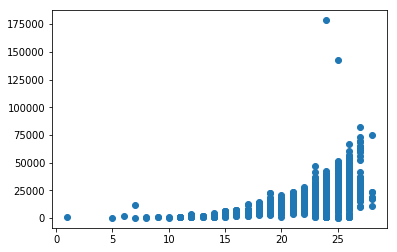

In [38]:
plt.scatter(df.year,df.car_price)                        

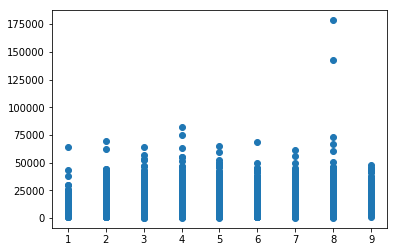

In [39]:
plt.scatter(df.sold_day,df.car_price)

In [40]:
 #removing first two largest values since its outlier and affecting dataset
df.car_price.nlargest()  

505     178500
499     142800
3072     82400
2931     75000
3015     73100
Name: car_price, dtype: int64

In [41]:
df = df.drop([505,499],axis=0)

# Model evaluation

In [42]:
y = df['car_price']

In [43]:
x = df[:]

In [44]:
del x['car_price']

In [45]:
#spliting the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=4)

In [46]:
#applying linear regression
reg=linear_model.LinearRegression()


In [47]:
#fitting the model 
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#calculating the cv scores
cv_scores = cross_val_score(reg, x_train, y_train, cv=5)

print(cv_scores)

[0.76116308 0.77714831 0.80950371 0.82236865 0.80297366]



# Predictions

In [49]:
 #predictions of car prices
predicted_y=reg.predict(x_test)

In [50]:
predicted_y

array([ 2.45212097e+04,  1.27392816e+04,  1.85209997e+04,  1.07154784e+04,
        1.44234261e+04,  2.11564461e+04,  1.97296106e+04,  2.09389612e+04,
        2.56087794e+03,  2.97748021e+04,  1.85940289e+04,  1.64641220e+04,
        5.69231085e+03,  1.62666019e+04,  8.30208103e+03,  1.05745995e+04,
        1.24490979e+04,  7.23752773e+02,  1.23192015e+04,  2.59929599e+03,
        9.75569685e+03,  2.17209315e+04,  9.60083033e+03,  8.96831175e+03,
        1.25174966e+04,  1.23427664e+04,  1.03174297e+04,  1.17005791e+04,
        1.16270719e+04,  1.30620042e+04,  1.19887355e+04,  1.52484910e+04,
        1.22711572e+04,  1.83552038e+04,  1.02420813e+04,  1.37998183e+04,
        1.48718692e+04,  2.00820737e+04,  1.42478317e+04,  9.93655526e+03,
        1.24070400e+04,  2.83349311e+04,  1.14100494e+04,  2.27355539e+04,
        2.21394288e+04,  2.10008374e+04,  9.85817728e+03,  1.10536304e+04,
        1.73240754e+04,  2.00557460e+04,  2.35502391e+04,  1.62620468e+04,
        1.47665736e+04,  

In [51]:
#calculatating r square 
print("r square",r2_score(y_test, predicted_y)) 


r square 0.8416522466062744


In [52]:
#saving the prediction in csv file 
y_predicated=pd.DataFrame(predicted_y, columns=['car_price']).to_csv('car_price.csv')